In [1]:
from functions.load_training_data import training_samples, load_regression_samples
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import time

# Load Training Samples

In [2]:
start = time.time()
image_samples, image_labels, mask_composites, full_images = training_samples(1000, [1,1,1,1], load_masks=True)
print(time.time() - start)

723.0787999629974


In [3]:
start = time.time()
cropped_imgs, cropped_masks, nuclei_sizes, labels = load_regression_samples(full_images, image_labels, mask_composites)
print(time.time() - start)

1.0871107578277588


In [4]:
nuclei_sizes[:9]

array([  0.  ,  86.75,   0.  , 669.  , 181.4 , 143.75,   0.  ,   0.  ,
         0.  ])

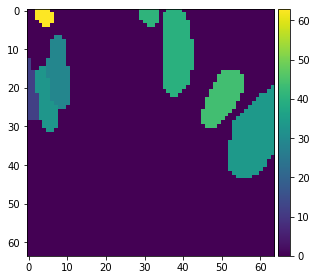

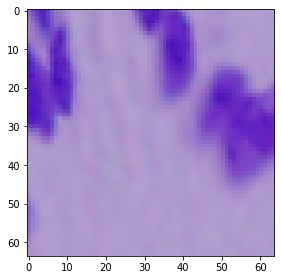

In [49]:
io.imshow(cropped_masks[1]); plt.figure()
io.imshow(cropped_imgs[1], cmap='nipy_spectral')

# Configure GPU

In [6]:
from functions.tf_config import config_gpu

config_gpu(5, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 5


# Configure Model

In [21]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(64, 64, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [22]:
predictions = model(cropped_imgs).numpy()
predictions

array([[-0.00383067],
       [-0.00139269],
       [-0.08399758],
       ...,
       [-0.0504927 ],
       [-0.08568975],
       [-0.07192635]], dtype=float32)

In [23]:
tf.nn.softmax(predictions).numpy()

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [28]:
cropped_masks.shape

(4000, 64, 64)

In [38]:
loss_fn = tf.keras.losses.MeanAbsoluteError(
    reduction="auto", name="mean_absolute_error"
)
loss_fn(nuclei_sizes, predictions).numpy()

199.5875

In [41]:
opt = tf.keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt, loss=loss_fn, metrics="mean_absolute_error")

In [47]:
model.fit(cropped_imgs, nuclei_sizes, epochs=10, batch_size=32,validation_split=0.05)

Epoch 1/10
119/119 [==============================] - 1s 4ms/step - loss: 121.3068 - mean_absolute_error: 121.3068 - val_loss: 128.5252 - val_mean_absolute_error: 128.5252
Epoch 2/10
119/119 [==============================] - 1s 5ms/step - loss: 121.0441 - mean_absolute_error: 121.0441 - val_loss: 129.7672 - val_mean_absolute_error: 129.7672
Epoch 3/10
119/119 [==============================] - 1s 5ms/step - loss: 120.9920 - mean_absolute_error: 120.9920 - val_loss: 129.2917 - val_mean_absolute_error: 129.2917
Epoch 4/10
119/119 [==============================] - 0s 4ms/step - loss: 120.8043 - mean_absolute_error: 120.8043 - val_loss: 127.8166 - val_mean_absolute_error: 127.8166
Epoch 5/10
119/119 [==============================] - 1s 5ms/step - loss: 119.8418 - mean_absolute_error: 119.8418 - val_loss: 128.1363 - val_mean_absolute_error: 128.1363
Epoch 6/10
119/119 [==============================] - 1s 5ms/step - loss: 120.0980 - mean_absolute_error: 120.0980 - val_loss: 127.4452 - va